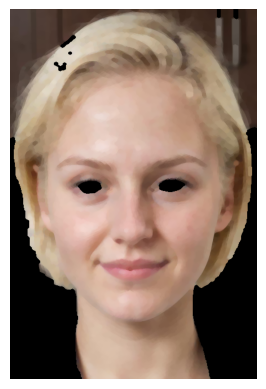

In [ ]:
# Required modules
import cv2
import numpy as np
import matplotlib.pyplot as plt

min_YCrCb = np.array([0,133,77],np.uint8)
max_YCrCb = np.array([235,173,127],np.uint8)

# Get pointer to video frames from primary device
image = cv2.imread("1.jpeg")
kernel_size = (7, 7)
alpha = 0.5

imageYCrCb = cv2.cvtColor(image,cv2.COLOR_BGR2YCR_CB)
skinRegionYCrCb = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb)

skinYCrCb = cv2.bitwise_and(image, image, mask = skinRegionYCrCb)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_size)
skinMask = cv2.morphologyEx(skinYCrCb, cv2.MORPH_CLOSE, kernel)
skinMask = cv2.morphologyEx(skinMask, cv2.MORPH_OPEN, kernel)

plt.imshow(cv2.cvtColor(skinMask, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



In [16]:
# Blend the smoothed skin with the original image
  # Controls the strength of smoothing (0.0 to 1.0)
finalImage = cv2.addWeighted(
    image, 1 - alpha,  
    skinMask, alpha,  
    0  
)

# Ensure non-skin areas remain unchanged
finalImage = np.where((skinMask > 150) & (skinMask < 200), finalImage, image)


cv2.imwrite('final_image.png', finalImage)
cv2.imwrite("detect_skin_1.png", np.hstack([finalImage]))

True

In [ ]:

min_YCrCb = np.array([0,133,77],np.uint8)
max_YCrCb = np.array([235,173,127],np.uint8)

# Get pointer to video frames from primary device
image = cv2.imread("1.jpeg")
kernel_size = (7, 7)
alpha = 0.5

imageYCrCb = cv2.cvtColor(image,cv2.COLOR_BGR2YCR_CB)
skinRegionYCrCb = cv2.inRange(imageYCrCb,min_YCrCb,max_YCrCb)

skinYCrCb = cv2.bitwise_and(image, image, mask = skinRegionYCrCb)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kernel_size)
skinMask = cv2.morphologyEx(skinYCrCb, cv2.MORPH_CLOSE, kernel)
skinMask = cv2.morphologyEx(skinMask, cv2.MORPH_OPEN, kernel)

finalImage = cv2.addWeighted(
    image, 1 - alpha,  
    skinMask, alpha,  
    0  
)
finalImage = np.where((skinMask > 150) & (skinMask < 200), finalImage, image)

